In [1]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [4]:
import dagshub
import os
os.environ["MLFLOW_TRACKING_USERNAME"] = "subham-28"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "4b86e85660afc47e87bbde5f9785be943688b792"

In [5]:
dagshub.init(repo_owner='subham-28', repo_name='ML_Projects', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=cd9e3118-c6cc-4b84-8e84-2e04aafa9fa1&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=aa213617761301ff9bd3cb7678d296dbcb7adba2912802cc0dea56ad570ff3cd




Accessing as subham-28

Initialized MLflow to track repo "subham-28/ML_Projects"

Repository subham-28/ML_Projects initialized!

In [7]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/subham-28/ML_Projects.mlflow")

In [8]:
mlflow.set_experiment("Exp 4 - LGBM HP Tuning")

2025/06/21 05:26:42 INFO mlflow.tracking.fluent: Experiment with name 'Exp 4 - LGBM HP Tuning' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/d6801d8995964956ad4efcd1074277be', creation_time=1750483602090, experiment_id='3', last_update_time=1750483602090, lifecycle_stage='active', name='Exp 4 - LGBM HP Tuning', tags={}>

In [9]:
from sklearn import set_config
set_config(transform_output="pandas")

In [10]:
df = pd.read_csv('swiggy.csv')

In [11]:
data_clean_utils.perform_data_cleaning(df)

In [12]:
df = pd.read_csv('swiggy_cleaned.csv')

In [13]:
columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [14]:
df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


<Axes: >

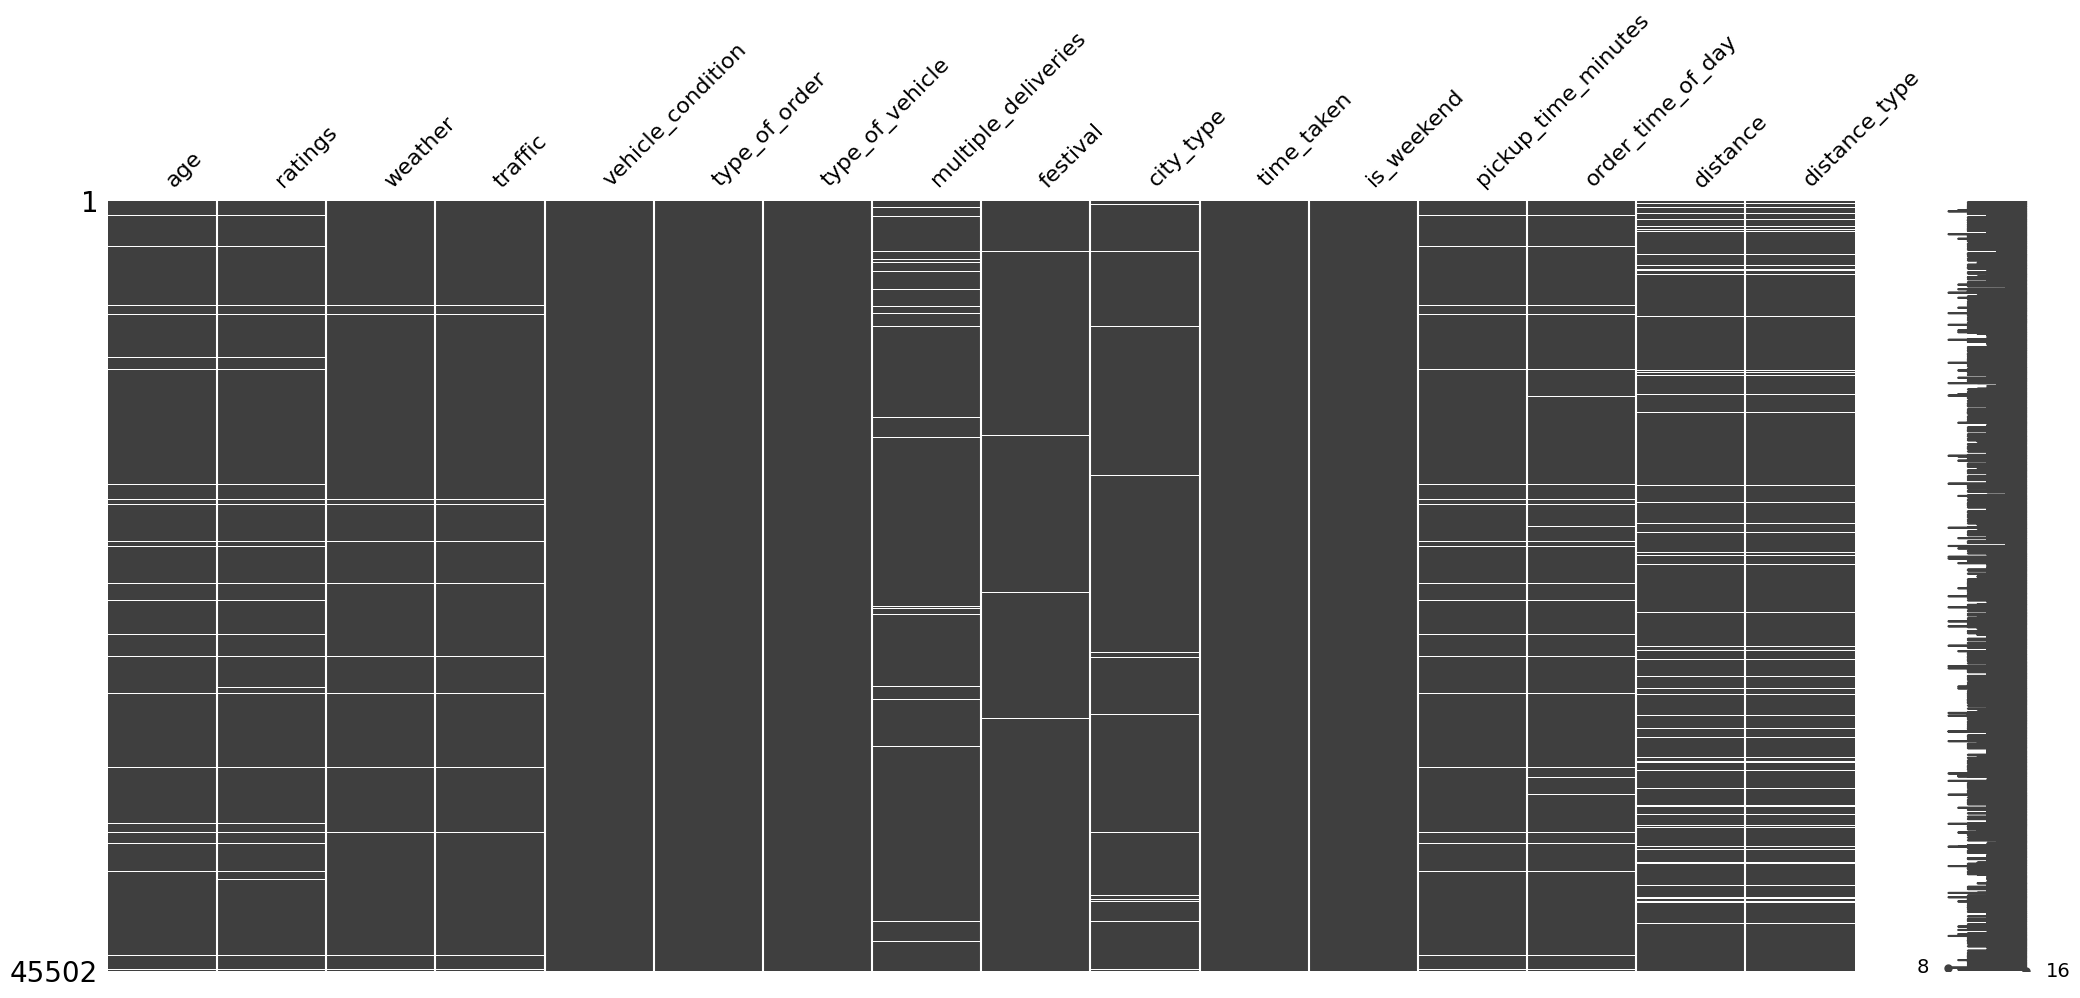

In [15]:
import missingno as msno
msno.matrix(df)

In [16]:
missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [17]:
temp_df = df.copy().dropna()

In [18]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [21]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [22]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order','type_of_vehicle',"festival","city_type","is_weekend","order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [23]:
traffic_order = ["low","medium","high","jam"]
distance_type_order = ["short","medium","long","very_long"]

In [24]:
preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [25]:
processing_pipeline = Pipeline(steps=[
                                ("preprocess",preprocessor)
                            ])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False))])

In [26]:
X_train_trans = processing_pipeline.fit_transform(X_train)
X_test_trans = processing_pipeline.transform(X_test)

In [27]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 21.1 MB/s eta 0:00:00


In [32]:
from lightgbm import LGBMRegressor
import optuna
import joblib

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor

In [34]:
def objective(trial):
    with mlflow.start_run(nested=True):
        params = {
            "n_estimators": trial.suggest_int("n_estimators",10,200),
            "max_depth": trial.suggest_int("max_depth",1,40),
            "learning_rate": trial.suggest_float("learning_rate",0.1,0.8),
            "subsample": trial.suggest_float("subsample",0.5,1),
            "min_child_weight": trial.suggest_int("min_child_weight",5,20),
            "min_split_gain": trial.suggest_float("min_split_gain",0,10),
            "reg_lambda": trial.suggest_float("reg_lambda",0,100),
            "random_state": 42,
            "n_jobs": -1,
        }

        # log model parameters
        mlflow.log_params(params)

        xgb_reg = LGBMRegressor(**params)
        model = TransformedTargetRegressor(regressor=xgb_reg,transformer=pt)

        # train the model
        model.fit(X_train_trans,y_train)

        # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)


        # perform cross validation
        cv_score = cross_val_score(model,
                                X_train_trans,
                                y_train,
                                cv=5,
                                scoring="neg_mean_absolute_error",
                                n_jobs=-1)

        # mean score
        mean_score = -(cv_score.mean())
        # log avg cross val error
        mlflow.log_metric("cross_val_error",mean_score)

        return mean_score

In [35]:
# create optuna study
study = optuna.create_study(direction="minimize")

with mlflow.start_run(run_name="best_model"):
    # optimize the objective function
    study.optimize(objective,n_trials=50,n_jobs=-1,show_progress_bar=True)

    # log the best parameters
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

    # train the model on best parameters
    best_lgbm = LGBMRegressor(**study.best_params)

    # Fit the model on the transformed target variable as before
    best_lgbm.fit(X_train_trans,y_train_pt.values.ravel())

    # get the predictions
    y_pred_train = best_lgbm.predict(X_train_trans)
    y_pred_test = best_lgbm.predict(X_test_trans)

    # get the actual predictions values
    y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
    y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))


    # perform cross validation using TransformedTargetRegressor
    # This ensures correct evaluation with the transformed target
    model = TransformedTargetRegressor(regressor=best_lgbm,
                                        transformer=pt)

    scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

    # log metrics
    mlflow.log_metric("training_error",mean_absolute_error(y_train,y_pred_train_org))
    mlflow.log_metric("test_error",mean_absolute_error(y_test,y_pred_test_org))
    mlflow.log_metric("training_r2",r2_score(y_train,y_pred_train_org))
    mlflow.log_metric("test_r2",r2_score(y_test,y_pred_test_org))
    mlflow.log_metric("cross_val",- scores.mean())

    # Save the model locally
    model_path = "best_lgbm_model.joblib"
    joblib.dump(best_lgbm, model_path)

    # Log the model file as an artifact
    mlflow.log_artifact(model_path, artifact_path="model")

    # Clean up the local file
    os.remove(model_path)

[I 2025-06-21 05:40:55,460] A new study created in memory with name: no-name-de3d1db5-da79-47bb-a48b-31045da200b6


  0%|          | 0/50 [00:00<?, ?it/s]

🏃 View run youthful-deer-123 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/3/runs/45469e54ac3f472f9aebf186683857bd
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/3
🏃 View run worried-moth-415 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/3/runs/d66e22df49304247ac9540baa7775e79
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/3
[I 2025-06-21 05:41:08,579] Trial 1 finished with value: 4.002943697612642 and parameters: {'n_estimators': 131, 'max_depth': 3, 'learning_rate': 0.5973941163197082, 'subsample': 0.9696523284476115, 'min_child_weight': 6, 'min_split_gain': 9.972942375114002, 'reg_lambda': 59.90346840384751}. Best is trial 1 with value: 4.002943697612642.
[I 2025-06-21 05:41:08,647] Trial 0 finished with value: 3.410676338517734 and parameters: {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.7554072519649736, 'subsample': 0.7506222891947325, 'min_child_weigh

In [36]:
study.best_params

{'n_estimators': 39,
 'max_depth': 36,
 'learning_rate': 0.349749946044175,
 'subsample': 0.58471627276528,
 'min_child_weight': 9,
 'min_split_gain': 0.0003849322908342362,
 'reg_lambda': 44.73393398912214}

In [37]:
study.best_value

3.13179949593835

In [38]:
optuna.visualization.plot_optimization_history(study)

In [39]:
optuna.visualization.plot_param_importances(study)

In [40]:
optuna.visualization.plot_slice(study)